# 机器学习实战入门：Scikit-Learn
HAVEN 2023/7/7

[sklearn](https://scikit-learn.org/stable/)是一个经典的机器学习算法库。里面包含了机器学习所需要用到的六大板块：分类、回归、聚类、降维、模型选择和数据的预处理。除了神经网络没有涉及之外，其他所有的功能均能够通过sklearn实现，所以是一个既能快速辅助开发，又能学习知识的工具包，对机器学习入门的同学很有帮助。

这里，老师给出了使用sklearn的方法。当你想要使用一种算法或者模型的时候，可以查看api文档。文档中说明了每一个方法或类的属性、可用的参数、参数的默认值、参数的作用；建模之后可以对哪些属性进行调用；方法有什么作用；以及实际操作的演示代码examples。除此之外还能通过这个examples来学习sklearn针对各种特定背景下问题的解决方案，里面不仅仅包含sklearn，还有可视化的相关操作。从中可以学习到开展某一个项目研究应该遵循什么步骤，需要怎么做数据的分析和处理，应该采取什么模型等等；更重要的是提供了模板代码，你可以通过这些代码直接套用模板，形成漂亮的图片和高效的数据展示。

![sklearn](1.png)

## 机器学习的sklearn实现
下面我们通过这个程序来了解一下常见的模型评估方法。

In [96]:
import numpy as np
import os
#用来提供访问操作系统功能的方法。
%matplotlib inline
#是 Jupyter Notebook 或者 JupyterLab 的一个魔法命令，用于指定在 Notebook 中显示 Matplotlib 绘图的方式。
# matplotlib inline 表示将图像直接嵌入到 Notebook 中。
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize']=14
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12
#设置了 Matplotlib 的默认参数。
# 这里分别设置了坐标轴标签的字体大小为 14，x 轴和 y 轴刻度标签的字体大小为 12。
import warnings
warnings.filterwarnings('ignore')
#设置忽略警告信息。这里的作用是让程序在运行时不显示警告信息，
#避免干扰可视化结果。
np.random.seed(42)
#设置 NumPy 的随机数种子，以便产生可重复的随机数序列。


**数据集读取**

In [58]:
from sklearn.datasets import fetch_openml
mnist=fetch_openml(name='mnist_784',version=1,cache=True)
mnist


d:\LenovoSoftstore\Install\anaconda\envs\pytorch\lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [83]:
X,y=mnist['data'],mnist['target']
#默认的，数据放在data下，标签放在target下
X=X.values#这个维度是(70000，784)
y=np.array(y.values)
#这里比较麻烦，因为最初返回的dataframe的seires格式，使用values只能返回df的array，还需要进一步用numpy转化为数组。
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

![sample](2.png)

如图是一张mnist中的手写图像。长28像素，宽28像素，由于是灰度图，所以颜色通道只有“灰度”一个，所以总维度数是28\*28\*1=784.一个像素点代表一个维度；X就存放着这些像素点的信息，y是其实际反映的数字。

In [84]:
x_train,x_test,y_train,y_test=X[:60000],X[60000:],y[:60000],y[60000:]
#高维数组的切分，在未指定其他维度的切分方式的时候，一般都是只横着切一大刀。
#前60000个是训练集，后10000个是测试集(或者是验证集)
type(y_train)

numpy.ndarray

`np.random.permutation()` 总体来说他是一个随机排列函数,就是将输入的数据进行随机排列,官方文档指出,此函数只能针对一维数据随机排列,对于多维数据只能对第一维度的数据进行随机排列。

简而言之：`np.random.permutation`函数的作用就是按照给定列表生成一个打乱后的随机列表,如果里面是个整数，那就是一个以它为上界的整数列表

In [85]:
#shuffle
import numpy as np
#为什么要洗牌？为了消除数据的顺序对模型训练结果带来的影响。原始数据是按照顺序放在一起的。
shuffle_index=np.random.permutation(60000)
# shuffle_index.reshape(-1,1)
shuffle_index

array([33784,  3455, 22620, ..., 31231,  9043,  7530])

x_train 是一个 DataFrame，它包含多列数据，每一列都有一个列名。要访问 x_train 中的一行数据，您需要使用 .iloc 方法，并传递行索引。

使用 DataFrame[x] 的形式访问一个 DataFrame 的默认行为是返回该 DataFrame 中名为 x 的列数据。这是因为在 pandas 中，DataFrame 是由多个 Series 组成的，每个 Series 都有一个列名，而 DataFrame 的列名就是各个 Series 的列名。

In [86]:
#在一个列表里面套一个列表可以根据内层列表的元素作为索引返回对应元素构成的列表。
x_train,y_train=x_train[shuffle_index],y_train[shuffle_index]
type(y_train)

numpy.ndarray

## 数据评估方法一：交叉验证
**使用交叉验证**来进行模型的评估。

![cross-validation](3.png)

首先，对数据集进行切分，一部分是训练集，另一部分是测试集。训练集是实际上用到构建模型的数据；测试集不会用到。一般的比例是8：2.

测试集是十分珍贵的，一般作为所有准备工作完毕之后，最后一次测试才用到，就像高考似的。在训练中可以进行一些模拟测试来在测试之前改进自己，就需要验证集。我们每次训练的时候都把训练集分成10份，拿出1份作为验证集。为了避免验证集的难度影响效果的评估，我们用一个10轮的循环，每次拿出一份作为验证集，剩下的作为训练集，我们做10次验证，这就是十折交叉验证。最后对每一次的准确率取平均值来预测模型的准确率，如果准确率过低，需要调整超参数，甚至更换模型来重新评估。最后拿测试集来下定论，测试集就相当于我们需要预测的任务，它的实际工作意义决定了它不能像验证集一样不停重来。

In [90]:
y_train5=(y_train=='5')#用小括号就直接返回数组，用中括号返回的就是加了一维的数组
y_test5=(y_test=='5')
#这里相当于是把一个十分类任务转化为一个二分类任务。y的值全部变成了true和false
y_train5

array([False, False, False, ..., False, False, False])

In [91]:
from sklearn.linear_model import SGDClassifier#这里导入了一个线性分类器，用SGD做优化
sgd_clf=SGDClassifier(max_iter=10,random_state=42)#还是生成一个可重复的随机序列
sgd_clf.fit(x_train,y_train5)#训练函数，传入一个x，传入一个对应的y就可以进行训练，结果放在这个分类器对象中。

d:\LenovoSoftstore\Install\anaconda\envs\pytorch\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDClassifier(max_iter=10, random_state=42)

In [93]:
#观察一下api文档，里面的predict函数可以直接用得到的模型进行训练。
sgd_clf.predict(x_test[[500]])#注意这里应该套一层括号才能得到一个二维数组，格式才符合模型要求

array([False])

In [94]:
y_test[500]

'3'

这样就完成了训练。从总体上来看，整个程序，数据的获取和处理占用了绝大部分的篇幅，但是最终的训练和预测仅仅只用了两三行代码，所以可以说非常的方便。但是理解整个算法的运行过程对使用这些接口还是非常有帮助的。

同样使用api文档，我们可以找到一个十折交叉验证的接口`cross_val_score`。我们直接复制这个示例程序。

In [98]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(sgd_clf,x_train,y_train5,cv=3,scoring='accuracy'))#第一个参数就是我们所使用的模型，这里是用的梯度下降模型
#然后cv就是进行几折交叉验证，scoring就是最后采用何种评估方式，这里用accuracy就是结果的准确率来评估。
#结果是每一折的准确率，返回一个数组。

0.9561999999999999

除此之外，我们还可以自行交叉验证。sklearn里面提供了切分数据集的手段，比如这个kfold方法就可以试一下。

In [109]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
kfold=StratifiedKFold(n_splits=3,shuffle=True,random_state=42)#设置一个切分机器，用于生成可靠的分隔数据
acc=[]
for train_index,test_index in kfold.split(x_train,y_train):
    clone_clf=clone(sgd_clf)#每一折都要用完全相同的模型进行测试，而不应该有任何先后顺序，因为模型一直在变
    x_train_fold=x_train[train_index]
    y_train_fold=y_train5[train_index]
    x_test_fold=x_train[test_index]
    y_test_fold=y_train5[test_index]#得到了每一折的训练和测试数据，记得交叉验证全部都是在训练集上进行的
    clone_clf.fit(x_train_fold,y_train_fold)
    y_pred=clone_clf.predict(x_test_fold)
    n_correct=sum(y_pred==y_test_fold)
    #这里一开始报错bool object is not callable，是因为后面这个ytest出了问题，选错对象了。
    #那这个时候括号里就是一个false值了，因为无法统计从而得到数组。
    acc.append(n_correct/len(y_pred))
acc

[0.9597, 0.9651, 0.92875]

# 模型评估方法二：混淆矩阵
混淆矩阵就是那个阴阳与正负性所组成的表格，从中引出了一个特性叫做召回率，指的是某一类样本中正确地识别出了百分之几。

![recall](4.png)

In [110]:
from sklearn.model_selection import cross_val_predict
y_train_pred=cross_val_predict(sgd_clf,x_train,y_train5,cv=3)
y_train_pred.shape

(60000,)

这个60000虽然确实跟训练集一样多，但是产生方式不一样：这个是分别把三次交叉验证得到的预测值放在一起了，而正好所有的验证集包含了全集，所以最终也得是60000.

In [111]:
x_train.shape

(60000, 784)

In [112]:
#现在得到了预测的结果。混淆矩阵可以在sklearn的matrics.confusion_matrix中得到体现。
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train5,y_train_pred)

array([[54391,   188],
       [ 2440,  2981]], dtype=int64)

这个函数能够直接得到一个矩阵，分别表示从上到下，从左到右分别是：**TN,FP,FN,TP**.这里就表示有54391个数字正确地判断为“不是5”，188个数字错误地被判断为“是5”（本来不是5）；2440个数字错误地判断为“不是5”（本来是5），2981个数字正确地被判断为“是5”.

一个完美的训练应该让右上和左下尽可能小。

混淆矩阵在二分类问题中使用比较多，在多分类问题上，由于确实不好构建这种矩阵，一般来说不用，或者是将子问题转化为二分类问题来生成。

其运算公式是：

$$ precision=TP/(TP+FP) $$
$$ recall=TP/(TP+FN) $$

要想便捷地计算这两个值，可以导入sklearn中的metrics.precision_score和metrics.recallscore。

In [119]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
precision=precision_score(y_train5,y_train_pred)
recall=recall_score(y_train5,y_train_pred)
precision,recall

(0.9406752918901862, 0.549898542704298)

看来不太精确但是召回率不错，说明大部分是5的都找到了。

那有没有更好的评估标准能够不仅包含精确度还包含召回率呢？有的，它被称为F1-score。F1-score是上述两个指标的**调和平均**，也就是平滑掉了较低的指标对结果评估产生的较大影响。

![F1](5.png)

In [117]:
from sklearn.metrics import f1_score
f1_score(y_train5,y_train_pred)

0.6940628637951105

除此之外，SGDClassifier的分类依据是：对一个样本进行打分，根据得分情况分类。有时候我们不想只看到结果，我们还想看到到底打了多少分，然后自己制定一个分类策略，所以可以使用分类器下的一个方法叫做decision_function，它能够帮我们返回预测的score。

In [121]:
yscores=sgd_clf.decision_function([X[30000]])
yscores

array([-116095.08767003])

现在我们想自己制定一个规则（阈值），在阈值之内的被分为正类，阈值之外的被分为负类。

In [123]:
#阈值这里放在0
threshold=0
y_pred=(yscores>threshold)
y_pred

array([False])

下图生动反映了阈值对结果的影响。横轴是不同的图像得分情况的排列，竖线是假定的阈值，在每一个阈值上都标注了此处计算所得到的精确率和召回率。

![threshold](6.png)


我们通过调用模型的desicion-function函数来返回每一个实例的得分情况。

In [125]:
y_scores=cross_val_predict(sgd_clf,x_train,y_train5,cv=3,method='decision_function')
#通过指定调用对象的方法，让其执行决策函数而不是预测函数，就能够得到所有实例的得分情况。(默认是预测函数)
y_scores

array([-280920.93193717, -127407.93065787, -422913.15635667, ...,
       -115808.7972763 , -378976.18672115, -201731.03149634])

In [168]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_train5, y_scores)
thresholds.shape

(60000,)

In [169]:
precision.shape

(60001,)

In [170]:
recall.shape
#多一个是因为阈值相当于切一刀，最后会多出来这么一段，也要计算精度和召回率

(60001,)

这里默认把每一种元素的值都设置为了阈值，函数会在这些阈值之下尝试。

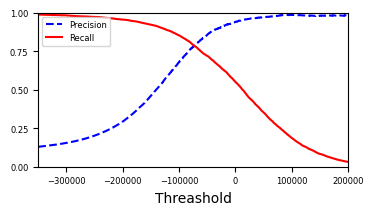

In [176]:
def plot_Precision_Recall(precision,recall,threshold):
    plt.plot(
        threshold,
        precision[:-1],
        "b--",
        label='Precision'
    )
    plt.plot(
        threshold,
        recall[:-1],
        "r",
        label='Recall'
    )
    plt.xticks(size=6)
    plt.yticks(size=6)
    plt.xlabel("Threashold",fontsize=10)
    plt.legend(loc='upper left',fontsize=6)
    plt.ylim([0,1])
plt.figure(figsize=(4,2))
plot_Precision_Recall(precision,recall,thresholds)
plt.xlim([-350000,200000])
plt.show()

可以发现在不同的阈值之下，精度与阈值永远都不能达到共赢。这是一个trade-off.

既然如此，我们怎么判断什么时候最好呢？这就要引出一个东西叫做**ROC曲线**。

## 模型评估方法三：ROC curves

ROC曲线其实就是在不同阈值之下TPR和FPR的关系：TPR是说所有的正类里面，确实正确识别出来了百分之几；FPR是说所有分类后的负类中，原本应该属于正类的占百分之几。
$$TPR=TP/(TP+FN)$$
$$FPR=FP/(TN+FP)$$
最终，得到的理应是一个增长的曲线。y轴：TPR，x轴：FPR。这是因为：FPR越大，说明错分为正类的就越多，那么从一定程度上讲，正确分为正类的也应该越多，因为如果模型本身没有出错的话，错误分为正类的增多代表着总体分为正类的增多。最夸张的就是：所有的负类都分成正类，那么其实所有的样本全部分成正类了。

In [158]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y_train5,y_scores)
#之所以fpr,tpr里面都不止1个值，是因为这个函数内置的就是用所有的threshold做实验，从而扩大了样本总量

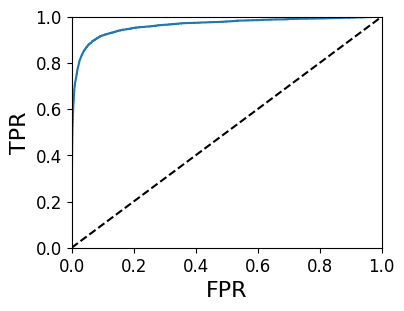

In [159]:
def ploc_ROC(fpr,tpr,label='None'):
    plt.plot(fpr,tpr,label=label)#画一个曲线，参数顺序是x-y-z。
    plt.plot([0,1],[0,1],'k--')#这个是参考线：对角线(也就是没有模型瞎蒙有50%的几率分对或者分错)
    plt.axis([0,1,0,1])#规定了坐标轴的范围：默认轴的顺序是x-y-z，最小和最大写到同一个列表中。
    plt.xlabel('FPR',fontsize=16)
    plt.ylabel('TPR',fontsize=16)
plt.figure(figsize=(4,3))#相当于是创建了一个画板，后面的操作都是基于这个画板作画
ploc_ROC(fpr,tpr)
plt.show()

最后我们给出一个评估模型的最终的标准：AUC（ROC的线下面积），我们的原则是ROC的拐点越接近左上就说明模型越好，因为这说明模型离着纯随机越远,划分效果越好。为了衡量离得到底多远，我们根据ROC的特性决定采用AUC评估模型。完美分类器AUC=1，而纯随机分类器AUC=0.5。sklearn中可以使用下面这个求AUC的函数。

In [177]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train5,y_scores)

0.9626072571283928

## 结语
在机器学习的模型评估方法中，选择哪种评估指标取决于你的具体问题和数据集的特点。

**F1-score**：F1-score是一种综合考虑了分类器的精度和召回率的评估指标。如果你的问题是分类问题，并且类别分布不平衡，那么F1-score是一个很好的选择。例如，对于医学诊断中的异常检测问题，异常情况可能非常少，此时使用F1-score可以更好地评估模型的性能。

**交叉验证**：交叉验证是一种评估模型性能的方法，其基本思想是将数据集分成若干个部分，每次使用其中一部分作为测试集，其余部分作为训练集来训练和评估模型，并重复多次以评估模型的泛化性能。如果你的数据集较小，或者你希望更好地评估模型的泛化性能，那么交叉验证是一个不错的选择。

**AUC**：AUC是一种用于评估二分类器性能的指标，其表示了ROC曲线下的面积。如果你的问题是二分类问题，并且你关心的是分类器在不同阈值下的性能，那么AUC是一个很好的选择。例如，在广告点击率预测中，你可能关心的是分类器在不同的阈值下的预测准确率，此时可以使用AUC来评估模型的性能。

综上所述，选择哪种评估指标取决于你的具体问题和数据集的特点。在实际应用中，你可以根据需要结合使用不同的评估指标来全面评估模型的性能。